In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

谁在看直播，RFM模型

In [5]:
room1 = pd.read_csv('863.tsv', names=['room_id', 'type', 'time_stamp',
                                      'act_type', 'user_name', 'content', 
                                      'Unknown_1', 'Unknown_2', 'year', 
                                      'month', 'day', 'hour', 'minu', 'sec'], sep='\t')
room2 = pd.read_csv('1038864.tsv', names=['room_id', 'type', 'time_stamp',
                                      'act_type', 'user_name', 'content', 
                                      'Unknown_1', 'Unknown_2', 'year', 
                                      'month', 'day', 'hour', 'minu', 'sec'], sep='\t')

room1 = room1[['room_id', 'type', 'time_stamp', 'act_type', 
             'user_name']]
room2 = room2[['room_id', 'type', 'time_stamp', 'act_type', 
             'user_name']]

room1_by_user = room1.groupby('user_name')
room2_by_user = room2.groupby('user_name')

{'            ': Int64Index([70787, 70839, 70840, 70841, 70846, 70849], dtype='int64'),
 '       so what?': Int64Index([104364, 104374, 104520, 104534, 104539, 104558, 104562, 104563,
             104566, 104574, 104666, 104712, 104714, 104797],
            dtype='int64'),
 '    灬★☆天☆★灬': Int64Index([205802], dtype='int64'),
 '   ヾ 海水不比泪咸 i°': Int64Index([172030], dtype='int64'),
 '  飞翔': Int64Index([176273, 176293, 176367, 180254, 180259, 180345], dtype='int64'),
 ' り散一地暖阳ゎ只為她♚': Int64Index([131231], dtype='int64'),
 ' 意中人☽': Int64Index([57658, 57663, 57664], dtype='int64'),
 ' 江湖の猫': Int64Index([181976, 182017, 182043, 182105, 182151, 182162, 182176, 182237,
             182292, 182306, 182318, 182346, 182392, 182404, 182422, 182459],
            dtype='int64'),
 '&消逝的幸福~': Int64Index([192736, 192780], dtype='int64'),
 '(°ー°〃)': Int64Index([204483], dtype='int64'),
 '(ಡωಡ)': Int64Index([114467, 114491, 114495, 114515, 114540, 114584, 114591, 114601,
             114612, 114627, 11463

In [8]:
latest_date = max(max(room2.time_stamp), max(room1.time_stamp))
user_list_1 = []
Recency_1 = []
Frequency_1 = []
Monetary_1 = []

for user, group in room1_by_user:
    # 当只有一个操作时无法计算频度
    count = len(group)
    if count > 1 :
        latest_user_date = group.time_stamp.max()
        min_user_date = group.time_stamp.min()
        time_diff = (latest_date - latest_user_date)/3600
        ac_fre = (latest_user_date - min_user_date)/count/3600
        user_list_1.append(user)
        Recency_1.append(time_diff)
        Frequency_1.append(ac_fre)
        Monetary_1.append(count)
    else:
        pass

user_list_2 = []
Recency_2 = []
Frequency_2 = []
Monetary_2 = []
for user, group in room2_by_user:
    # 当只有一个操作时无法计算频度
    count = len(group)
    if count > 1 :
        latest_user_date = group.time_stamp.max()
        min_user_date = group.time_stamp.min()
        time_diff = (latest_date - latest_user_date)/3600
        ac_fre = (latest_user_date - min_user_date)/count/3600
        user_list_2.append(user)
        Recency_2.append(time_diff)
        Frequency_2.append(ac_fre)
        Monetary_2.append(count)
    else:
        pass

data_1 = pd.DataFrame({'user_name':user_list_1, 'Recency':Recency_1,
                       'Frequency':Frequency_1, 'Monetary':Monetary_1})
data_2 = pd.DataFrame({'user_name':user_list_2, 'Recency':Recency_2,
                       'Frequency':Frequency_2, 'Monetary':Monetary_2})

In [9]:
data_1.head()

,user_name,Recency,Frequency,Monetary
0,,790.790302,0.006033,6
1,so what?,481.579123,0.009868,14
2,飞翔,167.261911,0.142978,6
3,意中人☽,912.897191,0.002139,3
4,江湖の猫,166.604506,0.007244,16


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [13]:
X_1 = data_1.iloc[:, 1:].values
X_2 = data_2.iloc[:, 1:].values

X_1 = (X_1 - X_1.mean(axis=0)) / X_1.std(axis=0)
X_2 = (X_2 - X_2.mean(axis=0)) / X_2.std(axis=0)

In [16]:
X_1.shape


(18227, 3)

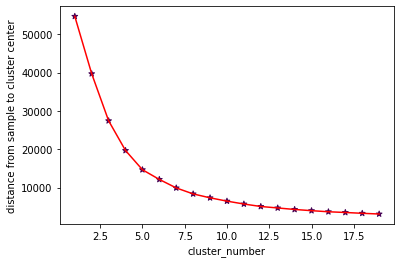

In [15]:
loss = []

for k in range(1, 20):
    kmeans_1 = KMeans(n_clusters=k, n_init=30)
    kmeans_1.fit_predict(X_1)
    loss.append(kmeans_1.inertia_)

figure = plt.figure(1)
plt.plot(np.arange(1, len(loss)+1), loss, 'r-')
plt.scatter(np.arange(1, len(loss)+1), loss, marker='*', c=[1]*len(loss))
plt.xlabel('cluster_number')
plt.ylabel('distance from sample to cluster center')
plt.show()


In [81]:
kmeans_1 = KMeans(n_clusters=5, n_init=30)
pred_1 = kmeans_1.fit_predict(X_1)
print(kmeans_1.cluster_centers_)
for i in range(5):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

[[-6.24916660e-01 -2.57696945e-01 -2.05476873e-02]
 [ 1.24697719e+00 -3.24047247e-01 -9.93446593e-02]
 [-6.28224021e-01 -4.39712482e-01  5.74134748e+00]
 [-1.05209777e+00 -4.74942036e-01  5.70210208e+01]
 [-5.24795599e-01  2.52129925e+00 -2.29437520e-01]]
第1类用户占比0.5596
第2类用户占比0.3285
第3类用户占比0.0106
第4类用户占比0.0001
第5类用户占比0.1012


In [82]:
kmeans_1 = KMeans(n_clusters=4, n_init=30)
pred_1 = kmeans_1.fit_predict(X_1)
print(kmeans_1.cluster_centers_)
for i in range(4):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

[[-0.52533891  2.49285343 -0.22883233]
 [-0.62761767 -0.26430893  0.0154031 ]
 [-0.72736379 -0.45363941  9.90681276]
 [ 1.24600873 -0.32453676 -0.08646565]]
第1类用户占比0.1029
第2类用户占比0.5631
第3类用户占比0.0044
第4类用户占比0.3296


In [83]:
kmeans_1 = KMeans(n_clusters=3, n_init=30)
pred_1 = kmeans_1.fit_predict(X_1)
print(kmeans_1.cluster_centers_)


[[-0.62795991 -0.26669711  0.09298559]
 [ 1.24748694 -0.32438291 -0.08813495]
 [-0.52576722  2.48843675 -0.22877371]]


In [84]:
for i in range(3):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

第1类用户占比0.5671
第2类用户占比0.3292
第3类用户占比0.1037


另一房间

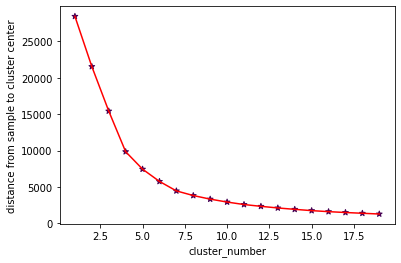

In [38]:
loss = []

for k in range(1, 20):
    kmeans_1 = KMeans(n_clusters=k, n_init=30)
    kmeans_1.fit_predict(X_2)
    loss.append(kmeans_1.inertia_)

figure = plt.figure(1)
plt.plot(np.arange(1, len(loss)+1), loss, 'r-')
plt.scatter(np.arange(1, len(loss)+1), loss, marker='*', c=[1]*len(loss))
plt.xlabel('cluster_number')
plt.ylabel('distance from sample to cluster center')
plt.show()

In [85]:
kmeans_1 = KMeans(n_clusters=3, n_init=30)
pred_1 = kmeans_1.fit_predict(X_2)
print(kmeans_1.cluster_centers_)
for i in range(3):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

[[ 1.41279781 -0.34382146 -0.09063696]
 [-0.47417021 -0.22468977  0.05124391]
 [-0.38844662  2.75923257 -0.1382429 ]]
第1类用户占比0.2473
第2类用户占比0.6675
第3类用户占比0.0852


In [86]:
kmeans_1 = KMeans(n_clusters=4, n_init=30)
pred_1 = kmeans_1.fit_predict(X_2)
print(kmeans_1.cluster_centers_)
for i in range(4):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

[[ 1.41318801e+00 -3.44082219e-01 -9.06342231e-02]
 [-1.41472062e+00 -4.34358373e-01  4.31955501e+01]
 [-3.88446623e-01  2.75923257e+00 -1.38242903e-01]
 [-4.73570869e-01 -2.24512554e-01  3.07697113e-02]]
第1类用户占比0.2473
第2类用户占比0.0003
第3类用户占比0.0852
第4类用户占比0.6672


In [87]:
kmeans_1 = KMeans(n_clusters=5, n_init=30)
pred_1 = kmeans_1.fit_predict(X_2)
print(kmeans_1.cluster_centers_)
for i in range(5):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc))

[[ 1.41246362e+00 -3.44392905e-01 -8.86093191e-02]
 [-3.87795770e-01  2.76478236e+00 -1.38255584e-01]
 [-4.70019215e-01 -2.22265378e-01 -2.08059996e-02]
 [-1.41472062e+00 -4.34358373e-01  4.31955501e+01]
 [-1.04730285e+00 -4.26273367e-01  7.45514175e+00]]
第1类用户占比0.2475
第2类用户占比0.0849
第3类用户占比0.6628
第4类用户占比0.0003
第5类用户占比0.0045


根据上述loss随k变化的图像，当k=3、4、5时模型可能有较好的结果，分别进行实验后发现k=4,5时某一类占比很小(<1%，为核心观众中的核心)。最后选择类别数选择k=3

生成一些KMeans聚类失败的场景

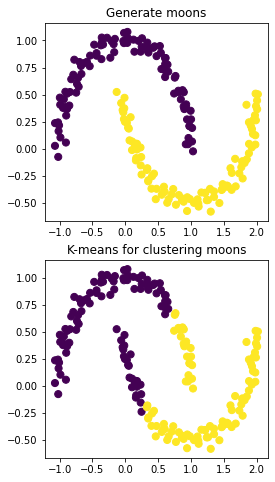

In [119]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='viridis')
plt.title("Generate moons")
plt.subplot(212)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.title("K-means for clustering moons")
plt.show()

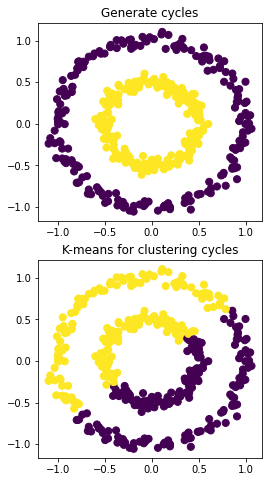

In [120]:
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.5, noise=.05)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='viridis')
plt.title("Generate cycles")
plt.subplot(212)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.title("K-means for clustering cycles")
plt.show()


不适合方差大小差异大的，因为kmeans基于到中心的距离

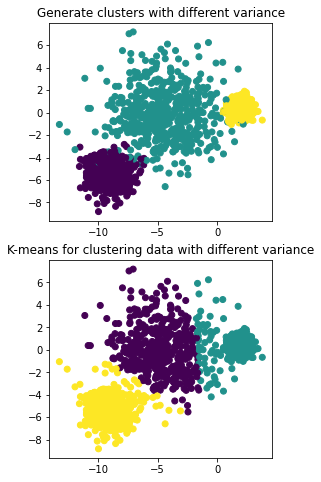

In [121]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5,  0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
plt.title("Generate clusters with different variance")
plt.subplot(212)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("K-means for clustering data with different variance")
plt.show()


因为是kmeans基于到中心的距离,所以同样不适合各向异性的分布

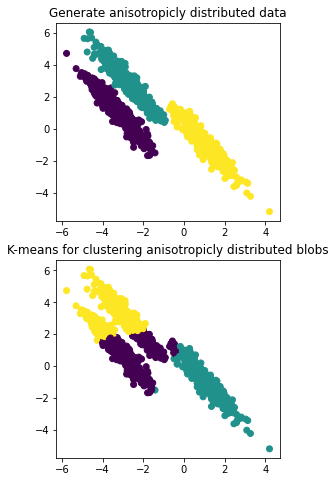

In [124]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("Generate anisotropicly distributed data")
plt.subplot(212)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("K-means for clustering anisotropicly distributed blobs")
plt.show()